In [8]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np
import os
import pandas as pd

In [2]:
# importing algorithm functions
import sys
sys.path.insert(1, '../../scripts/functions')
from method import method

## Testing Algorithm with Various Row Sizes

Test iterations and CPU of different systems (Gaussian, Uniform, 50/50 Gauss-Uniform) for $\mathbb{R}^{m\times 500}$

$m = \{ 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000 \}$

In [3]:
m = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

### Gaussian

In [4]:
gk_gauss_iter = []
gko_gauss_iter = []
mwrko_gauss_iter = []
gk_gauss_cpu = []
gko_gauss_cpu = []
mwrko_gauss_cpu = []

for row in m:
  # generate system
    print(row)
    A = np.random.randn(row,500)
    x = np.ones(500)
    y = A @ x
    # gk
    gk_start_cyclic_gauss = process_time()
    gk_gaussian = method(A,x,y,'GK', 0.5*10**-8)
    gk_stop_cyclic_gauss = process_time()
    # gko
    gko_start_cyclic_gauss = process_time()
    gko_gaussian = method(A,x,y,'GKO', 0.5*10**-8)
    gko_stop_cyclic_gauss = process_time()
    # mwrko
    mwrko_start_cyclic_gauss = process_time()
    mwrko_gaussian = method(A,x,y,'MWRKO', 0.5*10**-8)
    mwrko_stop_cyclic_gauss = process_time()
    # store data - iteration
    gk_gauss_iter.append(gk_gaussian[0])
    gko_gauss_iter.append(gko_gaussian[0])
    mwrko_gauss_iter.append(mwrko_gaussian[0])
    # store data - cpu
    gk_gauss_cpu.append(gk_stop_cyclic_gauss - gk_start_cyclic_gauss)
    gko_gauss_cpu.append(gko_stop_cyclic_gauss - gko_start_cyclic_gauss)
    mwrko_gauss_cpu.append(mwrko_stop_cyclic_gauss - mwrko_start_cyclic_gauss)

1000
2000
3000
4000
5000
6000
7000
8000
9000


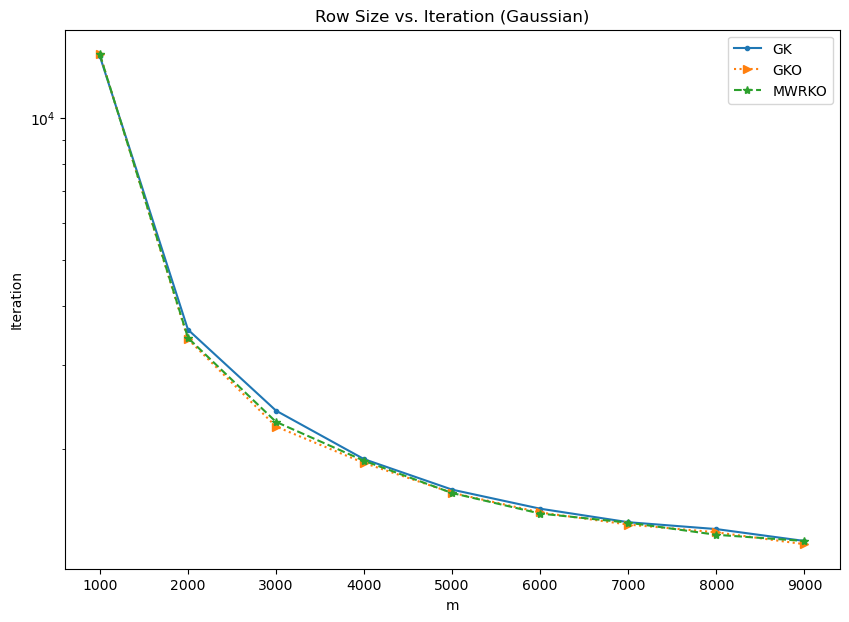

In [5]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_gauss_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_gauss_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_gauss_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (Gaussian)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-gauss-iter.png')

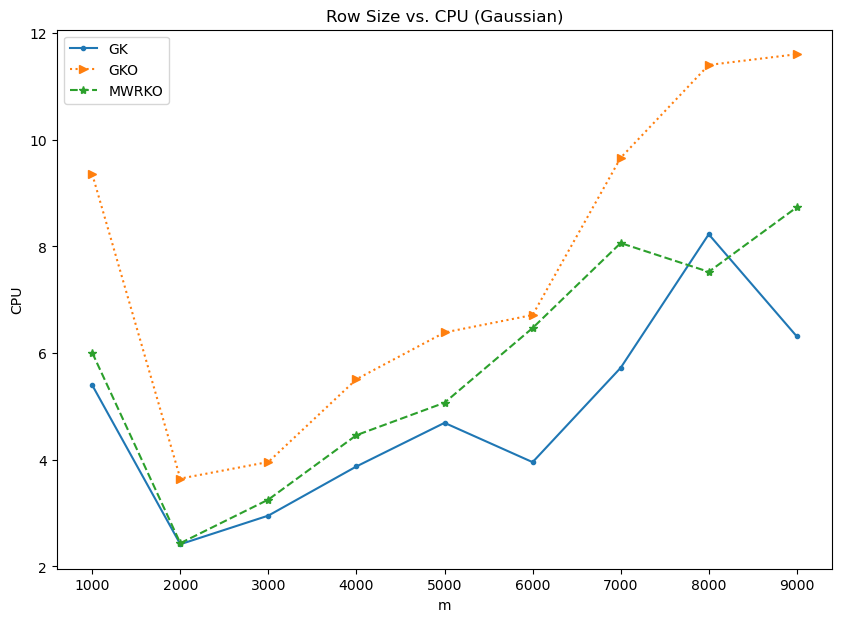

In [6]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_gauss_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_gauss_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_gauss_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (Gaussian)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-gauss-cpu.png')

In [9]:
df_cpu = pd.DataFrame()
df_cpu['m'] = m
df_cpu['GK'] = gk_gauss_cpu
df_cpu['GKO'] = gko_gauss_cpu
df_cpu['MWRKO'] = mwrko_gauss_cpu
df_cpu

,m,GK,GKO,MWRKO
0,1000,5.397994,9.352720,6.006374
1,2000,2.416544,3.647206,2.436061
2,3000,2.953250,3.958671,3.253670
3,4000,3.875110,5.510303,4.461387
4,5000,4.692388,6.386762,5.069465
5,6000,3.955152,6.713847,6.469870
6,7000,5.723790,9.660795,8.062875
7,8000,8.227660,11.401777,7.523329
8,9000,6.312535,11.603235,8.733668


### Uniform

In [12]:
gk_unif_iter = []
gko_unif_iter = []
mwrko_unif_iter = []
gk_unif_cpu = []
gko_unif_cpu = []
mwrko_unif_cpu = []

for row in m:
    # generate system
    print(row)
    A = np.random.rand(row,500)
    x = np.ones(500)
    y = A @ x
    # gk
    gk_start_cyclic_unif = process_time()
    gk_uniform = method(A,x,y,'GK', 0.5*10**-8)
    gk_stop_cyclic_unif = process_time()
    # gko
    gko_start_cyclic_unif = process_time()
    gko_uniform = method(A,x,y,'GKO', 0.5*10**-8)
    gko_stop_cyclic_unif = process_time()
    # mwrko
    mwrko_start_cyclic_unif = process_time()
    mwrko_uniform = method(A,x,y,'MWRKO', 0.5*10**-8)
    mwrko_stop_cyclic_unif = process_time()
    # store data - iteration
    gk_unif_iter.append(gk_uniform[0])
    gko_unif_iter.append(gko_uniform[0])
    mwrko_unif_iter.append(mwrko_uniform[0])
    # store data - cpu
    gk_unif_cpu.append(gk_stop_cyclic_unif - gk_start_cyclic_unif)
    gko_unif_cpu.append(gko_stop_cyclic_unif - gko_start_cyclic_unif)
    mwrko_unif_cpu.append(mwrko_stop_cyclic_unif - mwrko_start_cyclic_unif)

1000
2000
3000
4000
5000
6000
7000
8000
9000


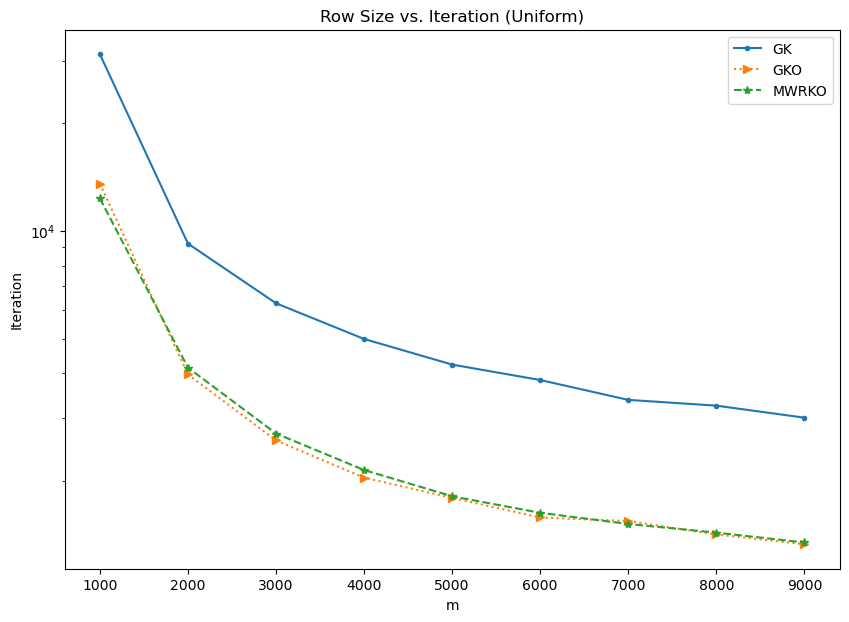

In [13]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_unif_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_unif_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_unif_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-unif-iter.png')

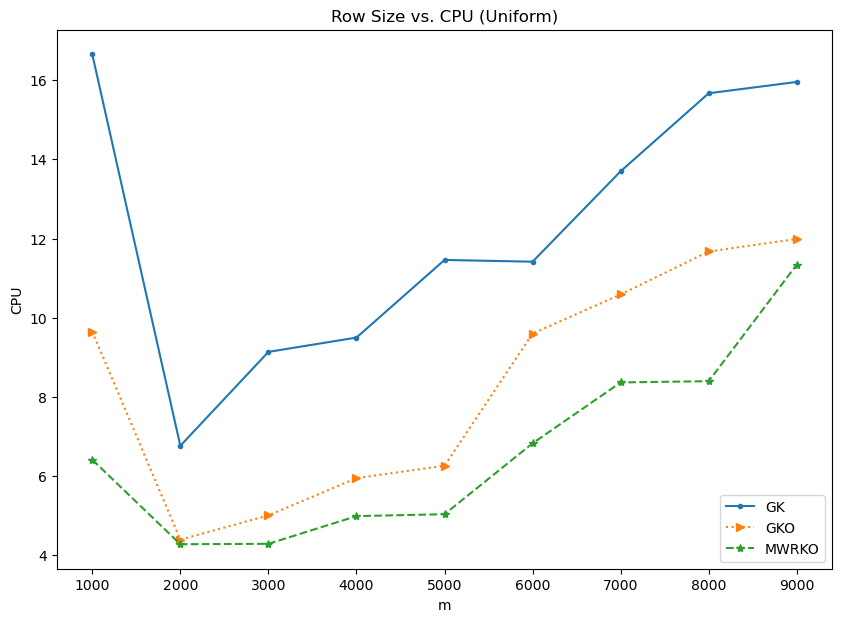

In [14]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_unif_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_unif_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_unif_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-unif-cpu.png')

In [15]:
df_cpu = pd.DataFrame()
df_cpu['m'] = m
df_cpu['GK'] = gk_unif_cpu
df_cpu['GKO'] = gko_unif_cpu
df_cpu['MWRKO'] = mwrko_unif_cpu
df_cpu

,m,GK,GKO,MWRKO
0,1000,16.657729,9.647532,6.409975
1,2000,6.760767,4.389191,4.273687
2,3000,9.134825,5.001764,4.283868
3,4000,9.495784,5.944174,4.983302
4,5000,11.458346,6.257678,5.031981
5,6000,11.414094,9.597951,6.824370
6,7000,13.700135,10.587433,8.362928
7,8000,15.671409,11.671890,8.394331
8,9000,15.956938,11.989733,11.342566


### 50/50 Gauss-Uniform

In [16]:
gk_comb_iter = []
gko_comb_iter = []
mwrko_comb_iter = []
gk_comb_cpu = []
gko_comb_cpu = []
mwrko_comb_cpu = []

for row in m:
  # generate system
  A1 = np.random.rand(int(row/2),500)
  A2 = np.random.randn(int(row/2),500)
  A = np.concatenate((A1, A2))
  x = np.ones(500)
  y = A @ x
  # gk
  gk_start_cyclic_comb = process_time()
  gk_comb = method(A,x,y,'GK', 0.5*10**-8)
  gk_stop_cyclic_comb = process_time()
  # gko
  gko_start_cyclic_comb = process_time()
  gko_comb = method(A,x,y,'GKO', 0.5*10**-8)
  gko_stop_cyclic_comb = process_time()
  # mwrko
  mwrko_start_cyclic_comb = process_time()
  mwrko_comb = method(A,x,y,'MWRKO', 0.5*10**-8)
  mwrko_stop_cyclic_comb = process_time()
  # store data - iteration
  gk_comb_iter.append(gk_comb[0])
  gko_comb_iter.append(gko_comb[0])
  mwrko_comb_iter.append(mwrko_comb[0])
  # store data - cpu
  gk_comb_cpu.append(gk_stop_cyclic_comb - gk_start_cyclic_comb)
  gko_comb_cpu.append(gko_stop_cyclic_comb - gko_start_cyclic_comb)
  mwrko_comb_cpu.append(mwrko_stop_cyclic_comb - mwrko_start_cyclic_comb)

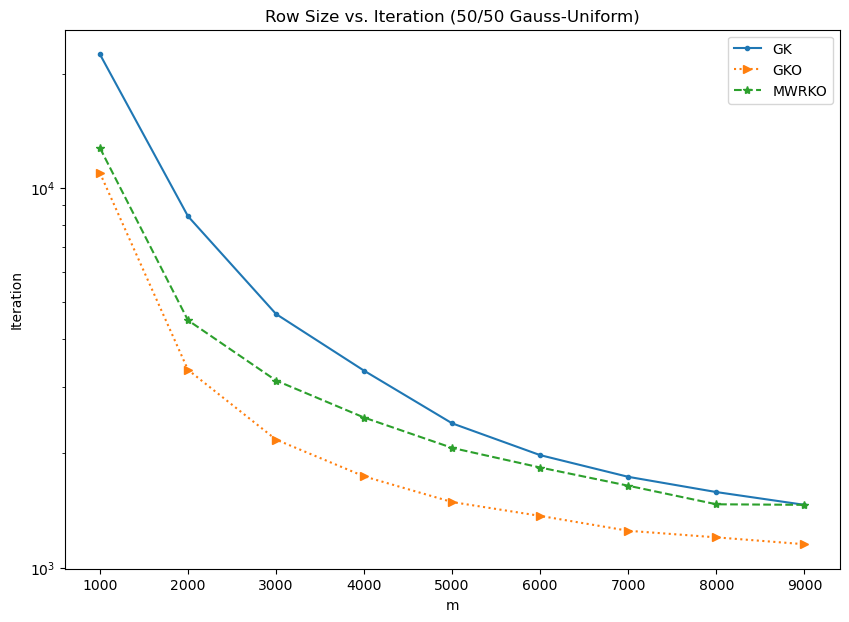

In [17]:
# Row size vs Iteration
plt.figure(figsize=(10,7))

plt.semilogy(m, gk_comb_iter, linestyle = 'solid', marker='.', label = 'GK')
plt.semilogy(m, gko_comb_iter, linestyle = 'dotted', marker='>', label = 'GKO')
plt.semilogy(m, mwrko_comb_iter, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('Iteration')
plt.title('Row Size vs. Iteration (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-comb-iter.png')

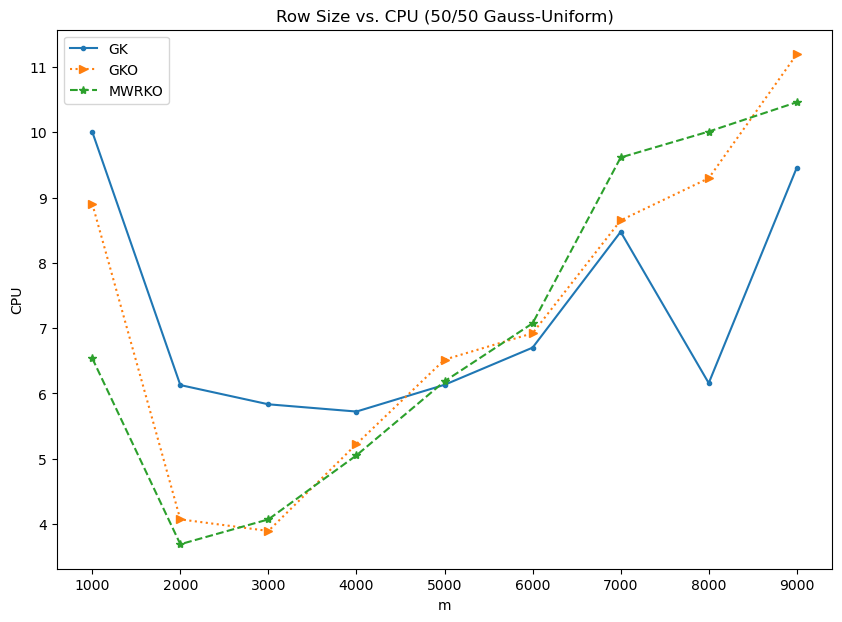

In [18]:
# Row size vs CPU
plt.figure(figsize=(10,7))

plt.plot(m, gk_comb_cpu, linestyle = 'solid', marker='.', label = 'GK')
plt.plot(m, gko_comb_cpu, linestyle = 'dotted', marker='>', label = 'GKO')
plt.plot(m, mwrko_comb_cpu, linestyle = 'dashed', marker='*', label = 'MWRKO')

plt.xlabel('m')
plt.ylabel('CPU')
plt.title('Row Size vs. CPU (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-comb-cpu.png')

In [19]:
df_cpu = pd.DataFrame()
df_cpu['m'] = m
df_cpu['GK'] = gk_comb_cpu
df_cpu['GKO'] = gko_comb_cpu
df_cpu['MWRKO'] = mwrko_comb_cpu
df_cpu

,m,GK,GKO,MWRKO
0,1000,10.007776,8.906278,6.538821
1,2000,6.128283,4.070825,3.690071
2,3000,5.833551,3.893367,4.070624
3,4000,5.722628,5.224770,5.051899
4,5000,6.132347,6.517472,6.185527
5,6000,6.701751,6.922634,7.074165
6,7000,8.475875,8.651219,9.614636
7,8000,6.158241,9.297402,10.012177
8,9000,9.459793,11.196682,10.461227


### Overall Results

<Figure size 10000x5000 with 0 Axes>

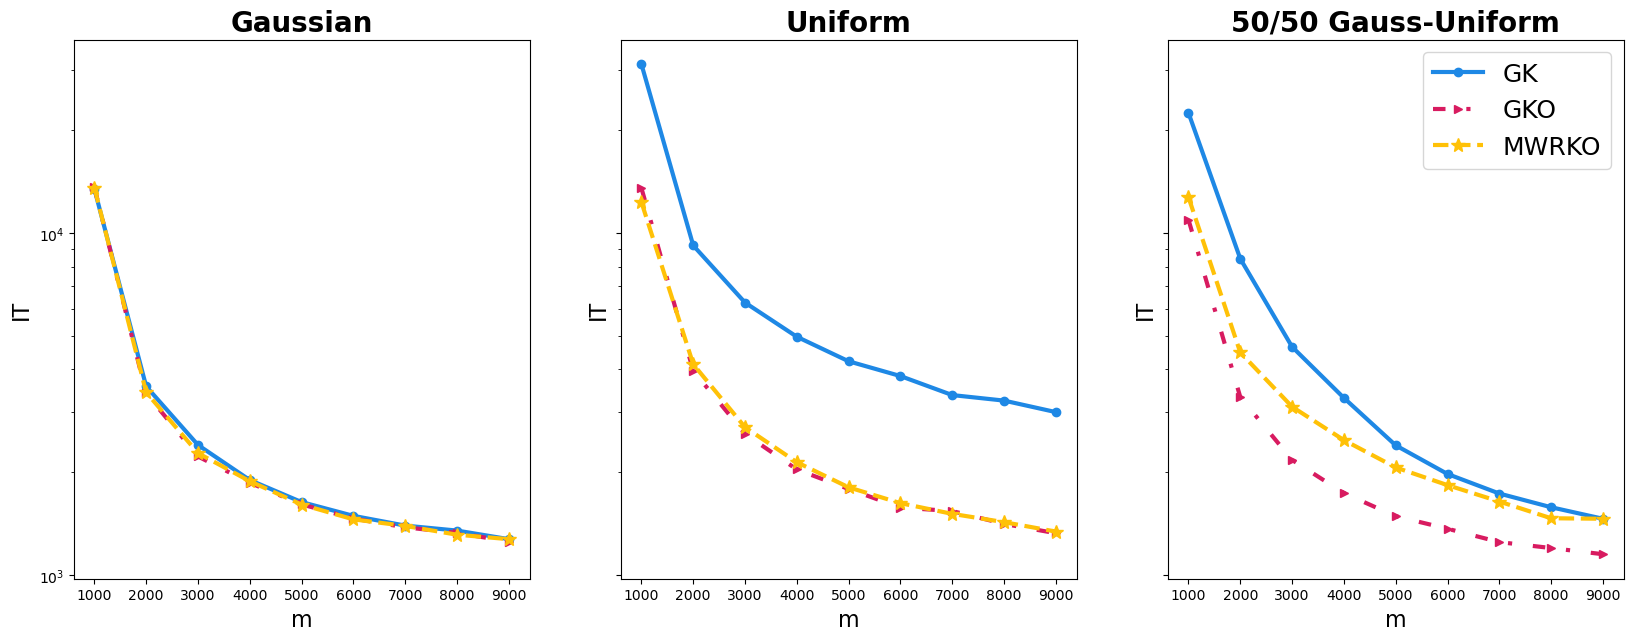

In [20]:
# iteration
plt.figure(figsize=(100, 50))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(m, gk_gauss_iter, marker='o', color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax1.semilogy(m, gko_gauss_iter,marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(m, mwrko_gauss_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('m', fontsize=16)
ax1.set_ylabel('IT', fontsize=16)

ax2.semilogy(m, gk_unif_iter, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax2.semilogy(m, gko_unif_iter, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(m, mwrko_unif_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax2.set(xlabel='m', ylabel='Iteration', title='Uniform')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('m', fontsize=16)
ax2.set_ylabel('IT', fontsize=16)

ax3.semilogy(m, gk_comb_iter, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax3.semilogy(m, gko_comb_iter, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(m, mwrko_comb_iter, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax3.set(xlabel='m', ylabel='Iteration', title='50/50 Gauss-Uniform')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('m', fontsize=16)
ax3.set_ylabel('IT', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/sizes-test/iter/size-iter.png')
plt.show()

<Figure size 10000x5000 with 0 Axes>

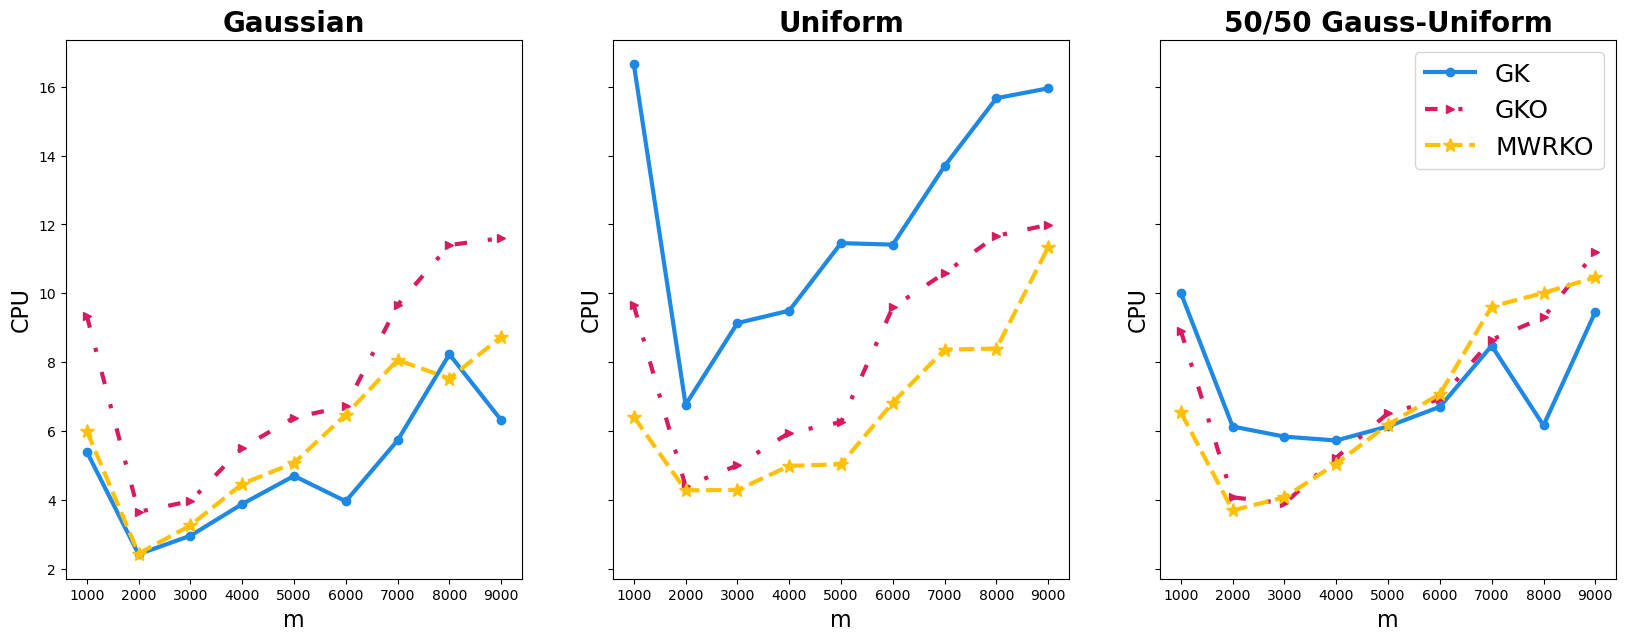

In [21]:
# CPU
plt.figure(figsize=(100, 50))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.plot(m, gk_gauss_cpu, marker='o', color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax1.plot(m, gko_gauss_cpu,marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.plot(m, mwrko_gauss_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('m', fontsize=16)
ax1.set_ylabel('CPU', fontsize=16)

ax2.plot(m, gk_unif_cpu, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax2.plot(m, gko_unif_cpu, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.plot(m, mwrko_unif_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax2.set(xlabel='m', ylabel='Iteration', title='Uniform')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('m', fontsize=16)
ax2.set_ylabel('CPU', fontsize=16)

ax3.plot(m, gk_comb_cpu, marker='o',color = '#1E88E5', 
             linewidth = 3, linestyle = 'solid', label = 'GK')
ax3.plot(m, gko_comb_cpu, marker='>', color = '#D81B60', 
             linewidth = 3, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.plot(m, mwrko_comb_cpu, marker='*', color = '#FFC107',
             linewidth = 3, linestyle = 'dashed', markersize=10, label = 'MWRKO')
ax3.set(xlabel='m', ylabel='Iteration', title='50/50 Gauss-Uniform')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('m', fontsize=16)
ax3.set_ylabel('CPU', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/sizes-test/cpu/size-cpu.png')
plt.show()